<a href="https://colab.research.google.com/github/NoahLee99/ML-DL-studylog/blob/main/IMDB_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB 영화 리뷰 분류하기

* IMDB는 영화에 관한 2만 5,000여개의 리뷰가 담겨 있으며,
<br> 해당 영화를 긍정 혹은 부정적으로 평가했는지도 담겨 있다.

* 로이터 뉴스 데이터와 마찬가지로 각 단어에 대한 전처리를 마친 상태이다.

* 데이터셋에 나타나는 빈도에 따라 인덱스 번호가 정해지므로
<br> 빈도가 높은 데이터를 불러와 학습시킬 수 있다.

* 데이터 전처리 과정을 로이터 뉴스 데이터와 거의 같으나,
<br> 다만 클래스가 긍정 혹은 부정의 이진 분류라 원-핫 인코딩 과정은 필요 없다.

* LSTM과 CNN의 조합을 이용해 딥러닝 모델을 생성하고자 한다.

In [4]:
# 필요 라이브러리 가동
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 훈련 세트와 테스트 세트 분할
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000) # 총 단어 수 5000개로 설정

# 리뷰당 단어 수 동일화(전처리)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [6]:
# 모델 생성
model = Sequential()

model.add(Embedding(5000, 100)) # (불러온 단어의 총 개수, 리뷰당 단어 수)
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1)) # 'valid'는 배열 그대로 특성 맵을 만들겠다는 의미
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# 텍스트 데이터는 1차원 배열이므로 1차원의 커널도 1차원 배열이다. (Conv1D)
# 이 커널이 보폭 1만큼 이동하며 가중치를 곱해 가장 큰 값을 뽑아 새로운 합성곱 배열을 생성한다. (MaxPooling1D)

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# 조기 종료 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

# 6번째 에포크에서 조기 종료 되었으며, 약 88%의 정확도를 보임

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.6789 - loss: 0.5519 - val_accuracy: 0.8890 - val_loss: 0.2739
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9073 - loss: 0.2428 - val_accuracy: 0.8928 - val_loss: 0.2778
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9332 - loss: 0.1835 - val_accuracy: 0.8869 - val_loss: 0.2736
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9505 - loss: 0.1431 - val_accuracy: 0.8950 - val_loss: 0.2758
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9600 - loss: 0.1113 - val_accuracy: 0.8877 - val_loss: 0.3178
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9699 - loss: 0.0906 - val_accuracy: 0.8880 - val_loss: 0.3082
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8768 - loss: 0.3396

 Test Accuracy: 0.8788


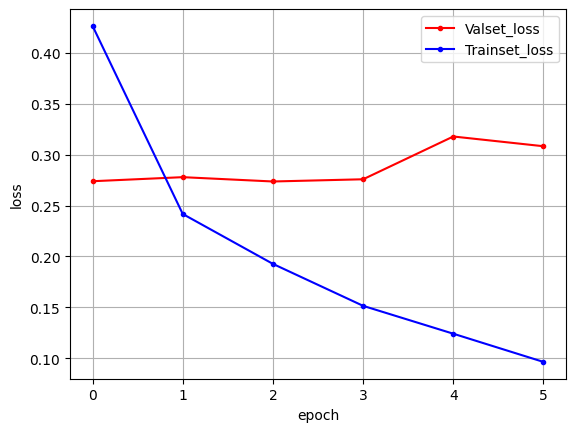

In [7]:
# 손실 그래프 시각화

# 검증 세트와 훈련 세트의 손실 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 생성
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Valset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프 설정
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()